In [ ]:
pip install pandas matplotlib seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
superstore_data = pd.read_csv('SuperStore.csv')

In [14]:
superstore_data.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0      42420.0  South  FUR-BO-10001798        Furniture    Bookcases   
1      42420.0  South  FUR-CH-10000454        Furniture       Chairs   
2      90036.0   West  OFF-LA-10000240  Office Supplies       Labels   
3      33311.0  South  FUR-TA-10000577        Furniture       Tables   
4      33311.0  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  
0                  Bush Somerset Collection Bookcase  261.9600  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4                     Eldon Fold 'N Roll Cart System   22.3680

In [15]:
superstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [19]:
# Total Unique Customers
superstore_data['Order ID'].nunique()

4922

In [24]:
# Custom Function To Calculate the Avg Order Value(AOV)
def custom_transformation(superstore_data):
    total_sales = superstore_data['Sales'].sum()
    num_orders = superstore_data['Order ID'].nunique()  
    aov = total_sales / num_orders 
    return pd.Series({
        'Total Sales': total_sales,
        'Average Order Value': aov
    })

In [29]:
# Implementation Of Custom Function Using Apply And Groupby
result_df = superstore_data.groupby(['Segment', 'Region']).apply(custom_transformation)
result_df

C:\Users\AKHIL AHMED\AppData\Local\Temp\ipykernel_23448\1776024442.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = superstore_data.groupby(['Segment', 'Region']).apply(custom_transformation)


Total Sales  Average Order Value
Segment     Region                                   
Consumer    Central  250210.5220           424.085631
            East     347906.6050           498.433532
            South    194702.2130           444.525600
            West     355241.1910           438.028596
Corporate   Central  152031.4968           440.671005
            East     195897.4250           462.022229
            South    120546.8745           494.044568
            West     220018.2785           460.289286
Home Office Central   90404.8944           409.071920
            East     125714.6960           508.966381
            South     73902.3715           577.362277
            West     134960.2150           452.886628

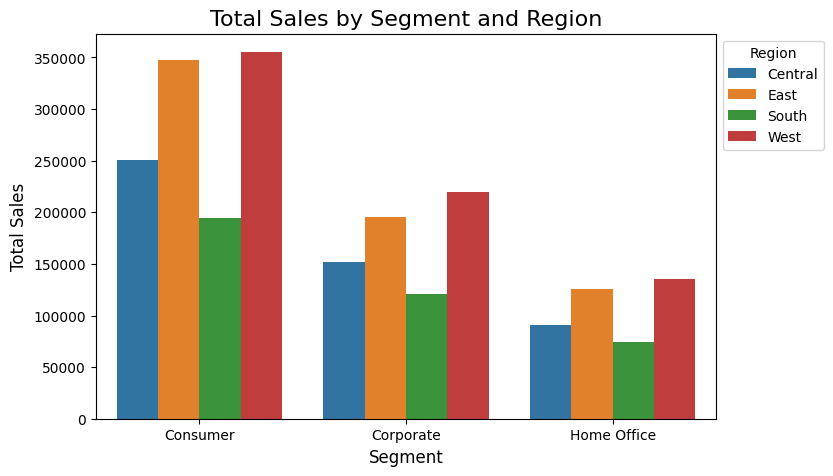

In [36]:
# Plot Total Sales by Segment and Region
plt.figure(figsize=(8, 5))
sns.barplot(x=result_df.index.get_level_values(0), y=result_df['Total Sales'], hue=result_df.index.get_level_values(1))
plt.title('Total Sales by Segment and Region', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()




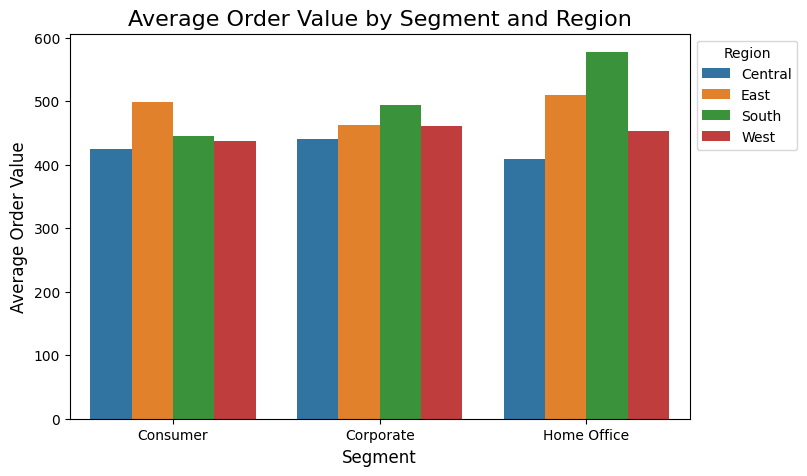

In [34]:
# Plot Average Order Value (AOV) by Segment and Region
plt.figure(figsize=(8, 5))
sns.barplot(x=result_df.index.get_level_values(0), y=result_df['Average Order Value'], hue=result_df.index.get_level_values(1))
plt.title('Average Order Value by Segment and Region', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Average Order Value', fontsize=12)
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()